<a href="https://colab.research.google.com/github/saurabhkumar004/Machine-Learning-in-TabPy/blob/master/HR_Attrition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import files
uploaded = files.upload()

Saving HR-Employee-Attrition.xlsx to HR-Employee-Attrition.xlsx


In [0]:
hr  = pd.read_excel("HR-Employee-Attrition.xlsx")

In [4]:
hr.head(1)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5


In [5]:
hr.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [6]:
hr.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [7]:
hr.shape

(1470, 35)

In [8]:
hr.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [9]:
hr.isnull().sum().sum()

0

In [0]:
hr_objects = hr.select_dtypes(include = "object")

In [0]:
hr_int = hr.select_dtypes(exclude = "object")

In [12]:
hr_int.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [13]:
hr_objects.columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

Data Exploration

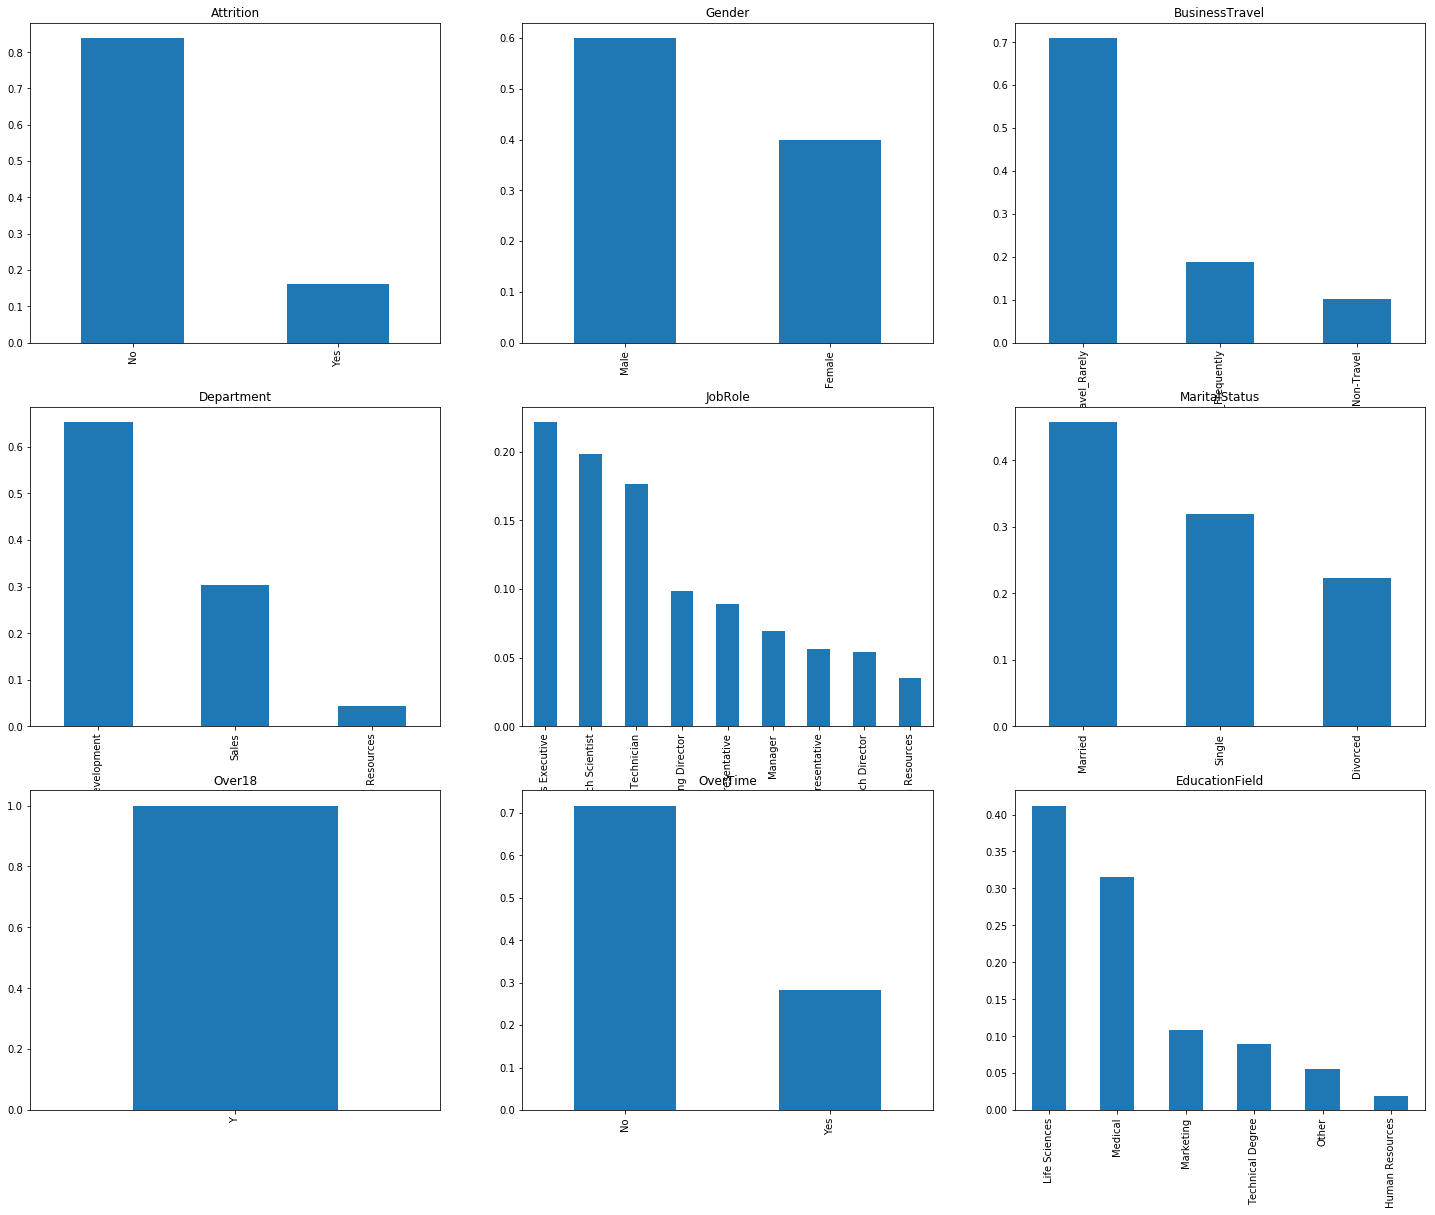

In [14]:
#Univariate analysis of Nominal fields
plt.figure(1, figsize=(25,20))
plt.subplot(331)
hr.Attrition.value_counts(normalize = True).plot.bar(title  = "Attrition")
plt.subplot(332)
hr.Gender.value_counts(normalize = True).plot.bar(title  = "Gender")
plt.subplot(333)
hr.BusinessTravel.value_counts(normalize = True).plot.bar(title  = "BusinessTravel")
plt.subplot(334)
hr.Department.value_counts(normalize = True).plot.bar(title  = "Department")
plt.subplot(335)
hr.JobRole.value_counts(normalize = True).plot.bar(title  = "JobRole")
plt.subplot(336)
hr.MaritalStatus.value_counts(normalize = True).plot.bar(title  = "MaritalStatus")
plt.subplot(337)
hr.Over18.value_counts(normalize = True).plot.bar(title  = "Over18")
plt.subplot(338)
hr.OverTime.value_counts(normalize = True).plot.bar(title  = "OverTime")
plt.subplot(339)
hr.EducationField.value_counts(normalize = True).plot.bar(title  = "EducationField")
plt.show()


In [15]:
hr_int.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [16]:
hr.YearsWithCurrManager.unique()

array([ 5,  7,  0,  2,  6,  8,  3, 11, 17,  1,  4, 12,  9, 10, 15, 13, 16,
       14])

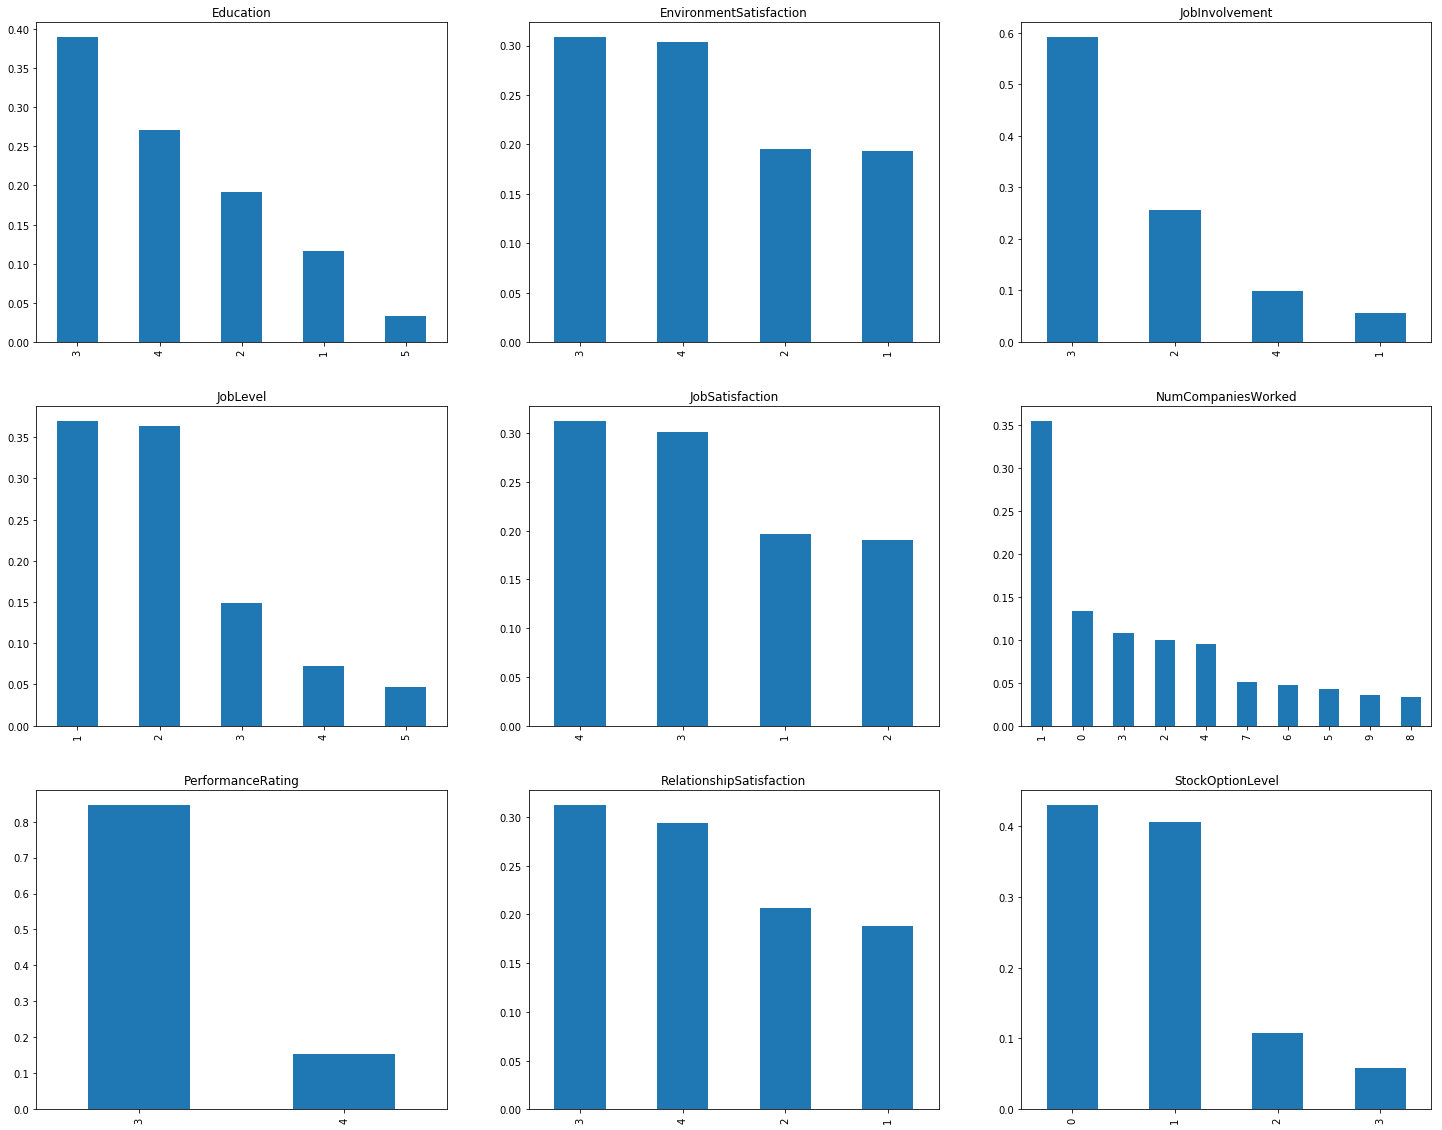

In [17]:
plt.figure(1, figsize=(25,20))
plt.subplot(331)
hr.Education.value_counts(normalize = True).plot.bar(title  = "Education")
plt.subplot(332)
hr.EnvironmentSatisfaction.value_counts(normalize = True).plot.bar(title  = "EnvironmentSatisfaction")
plt.subplot(333)
hr.JobInvolvement.value_counts(normalize = True).plot.bar(title  = "JobInvolvement")
plt.subplot(334)
hr.JobLevel.value_counts(normalize = True).plot.bar(title  = "JobLevel")
plt.subplot(335)
hr.JobSatisfaction.value_counts(normalize = True).plot.bar(title  = "JobSatisfaction")
plt.subplot(336)
hr.NumCompaniesWorked.value_counts(normalize = True).plot.bar(title  = "NumCompaniesWorked")
plt.subplot(337)
hr.PerformanceRating.value_counts(normalize = True).plot.bar(title  = "PerformanceRating")
plt.subplot(338)
hr.RelationshipSatisfaction.value_counts(normalize = True).plot.bar(title  = "RelationshipSatisfaction")
plt.subplot(339)
hr.StockOptionLevel.value_counts(normalize = True).plot.bar(title  = "StockOptionLevel")
plt.show()

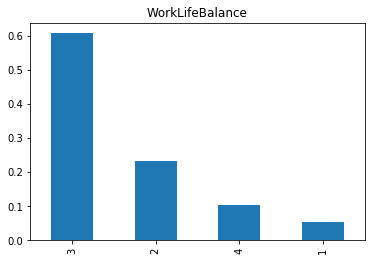

In [18]:
hr.WorkLifeBalance.value_counts(normalize = True).plot.bar(title  = "WorkLifeBalance")
plt.show()

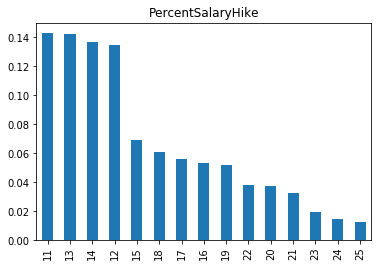

In [19]:
hr.PercentSalaryHike.value_counts(normalize = True).plot.bar(title  = "PercentSalaryHike")
plt.show()

In [20]:
hr_int.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

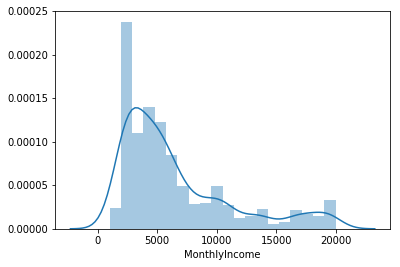

In [21]:
sns.distplot(hr.MonthlyIncome)
plt.show()

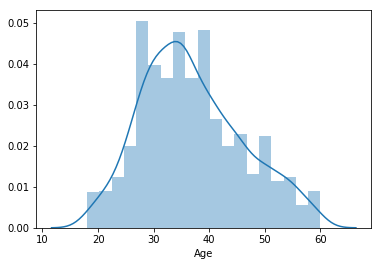

In [22]:
sns.distplot(hr.Age)
plt.show()

In [24]:
hr.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

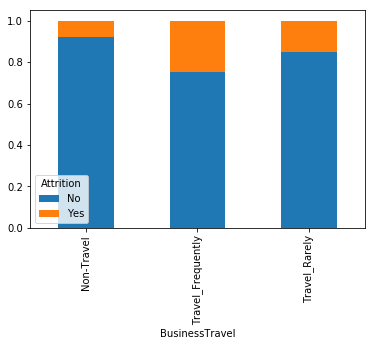

In [64]:
businesstravel=pd.crosstab(hr['BusinessTravel'],hr['Attrition'])
businesstravel.div(businesstravel.sum(1).astype(float), axis = 0).plot.bar(stacked = True)
plt.show()

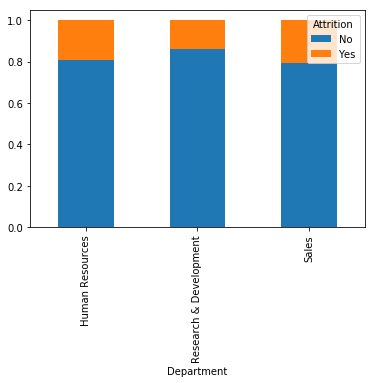

In [58]:
department  = pd.crosstab(hr['Department'],hr['Attrition'])
department.div(department.sum(1).astype(float), axis = 0).plot.bar(stacked = True)

In [0]:
bins = [0,5,10,15,30]
groups = ['Low','Average','High','Very High']
hr.dist_bin = pd.cut(hr.DistanceFromHome,bins,labels = groups)

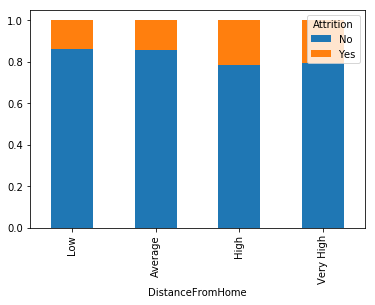

In [89]:
dist = pd.crosstab(hr.dist_bin,hr.Attrition)
dist.div(dist.sum(1).astype(float), axis = 0).plot.bar(stacked = True)
plt.show()

In [103]:
bins = [1000,5000,10000,15000,20000]
groups = ['Low','Average','High','Very High']
hr.monthlyincome_bin = pd.cut(hr.MonthlyIncome,bins,labels = groups)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until


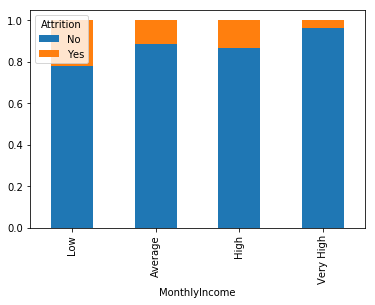

In [104]:
monthlyincome = pd.crosstab(hr.monthlyincome_bin,hr.Attrition)
monthlyincome.div(monthlyincome.sum(1).astype(float), axis = 0).plot.bar(stacked = True)
plt.show()

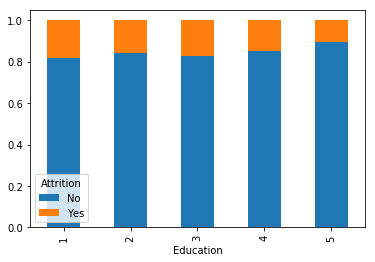

In [90]:
edu=pd.crosstab(hr['Education'],hr['Attrition'])
edu.div(edu.sum(1).astype(float), axis = 0).plot.bar(stacked = True)
plt.show()

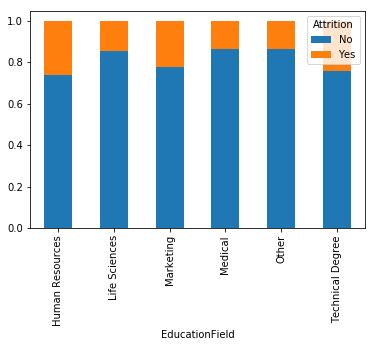

In [91]:
edufield=pd.crosstab(hr['EducationField'],hr['Attrition'])
edufield.div(edufield.sum(1).astype(float), axis = 0).plot.bar(stacked = True)
plt.show()

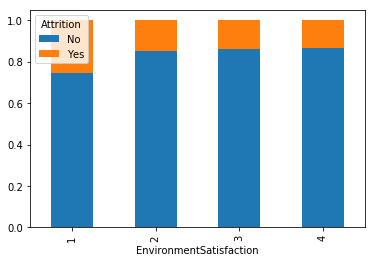

In [92]:
envsat=pd.crosstab(hr['EnvironmentSatisfaction'],hr['Attrition'])
envsat.div(envsat.sum(1).astype(float), axis = 0).plot.bar(stacked = True)
plt.show()

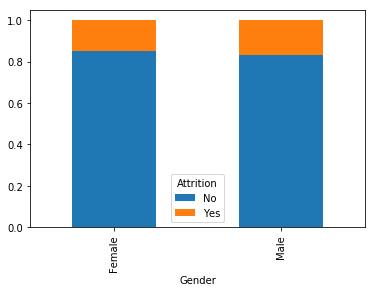

In [93]:
gender=pd.crosstab(hr['Gender'],hr['Attrition'])
gender.div(gender.sum(1).astype(float), axis = 0).plot.bar(stacked = True)
plt.show()

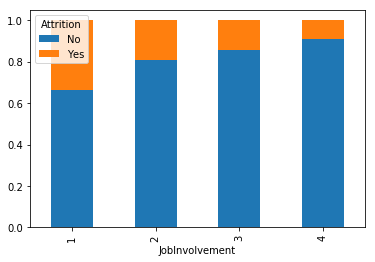

In [94]:
jobinv=pd.crosstab(hr['JobInvolvement'],hr['Attrition'])
jobinv.div(jobinv.sum(1).astype(float), axis = 0).plot.bar(stacked = True)
plt.show()

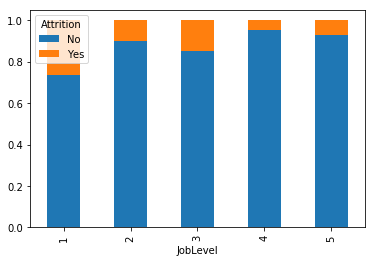

In [96]:
joblvl=pd.crosstab(hr['JobLevel'],hr['Attrition'])
joblvl.div(joblvl.sum(1).astype(float), axis = 0).plot.bar(stacked = True)
plt.show()

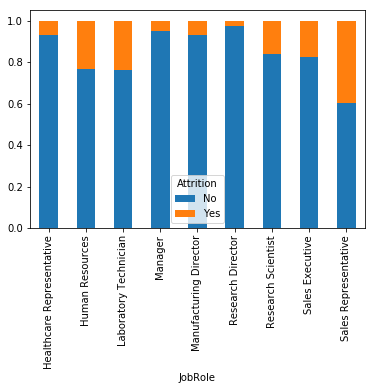

In [97]:
jobrole=pd.crosstab(hr['JobRole'],hr['Attrition'])
jobrole.div(jobrole.sum(1).astype(float), axis = 0).plot.bar(stacked = True)
plt.show()

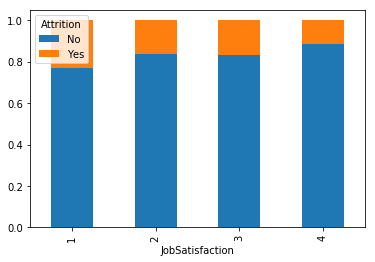

In [98]:
jobsatisfaction=pd.crosstab(hr['JobSatisfaction'],hr['Attrition'])
jobsatisfaction.div(jobsatisfaction.sum(1).astype(float), axis = 0).plot.bar(stacked = True)
plt.show()

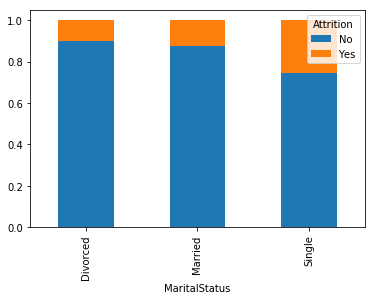

In [99]:
maritial=pd.crosstab(hr['MaritalStatus'],hr['Attrition'])
maritial.div(maritial.sum(1).astype(float), axis = 0).plot.bar(stacked = True)
plt.show()

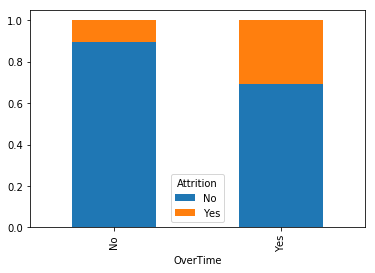

In [105]:
overtime=pd.crosstab(hr['OverTime'],hr['Attrition'])
overtime.div(overtime.sum(1).astype(float), axis = 0).plot.bar(stacked = True)
plt.show()

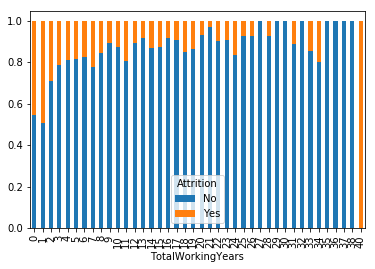

In [117]:
totalworkingyrs=pd.crosstab(hr['TotalWorkingYears'],hr['Attrition'])
totalworkingyrs.div(totalworkingyrs.sum(1).astype(float), axis = 0).plot.bar(stacked = True)
plt.show()

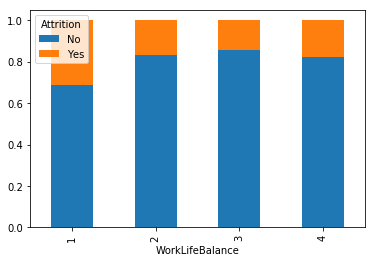

In [111]:
worklife=pd.crosstab(hr['WorkLifeBalance'],hr['Attrition'])
worklife.div(worklife.sum(1).astype(float), axis = 0).plot.bar(stacked = True)
plt.show()

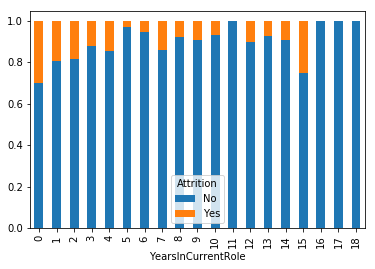

In [116]:
yrs=pd.crosstab(hr['YearsInCurrentRole'],hr['Attrition'])
yrs.div(yrs.sum(1).astype(float), axis = 0).plot.bar(stacked = True)
plt.show()

In [0]:
Explore above some of the graph in different forms like line chart etc